## Data Exploration and Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

%matplotlib inline
sns.set(color_codes = True)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./treadmill_data.csv")

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape

(180, 9)

In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [10]:
df.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

## Statistical Summary

In [12]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [14]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Takeaways
* Appears to be no missing values.
* 3 unique `products` with `KP281` being the most common of the 3.
* `Ages` range from 18 to 50, `mean` of ~29 and 75% of all people being under 33.
* 75% of people have 16 years of `education` or less.
* 104 people are `male`, 76 are `female`.
* `Std` of both `income` and `miles` are quite high, possible outliers.

In [15]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [16]:
df.duplicated(subset = None, keep = 'first').sum()

0

#### No missing values confirmed.

## Value Counts

In [17]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [18]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [20]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

## Unique Values

In [21]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [35]:
for col in df.columns:
    print('\nUnique %s Values:'%col)
    print(df[col].unique())


Unique Product Values:
['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

Unique Age Values:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Unique Gender Values:
['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Unique Education Values:
[14 15 12 13 16 18 20 21]

Unique MaritalStatus Values:
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

Unique Usage Values:
[3 2 4 5 6 7]

Unique Fitness Values:
[4 3 2 1 5]

Unique Income Values:
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]



# Graphical Analysis
## Univariate Analysis of Numerical Variables

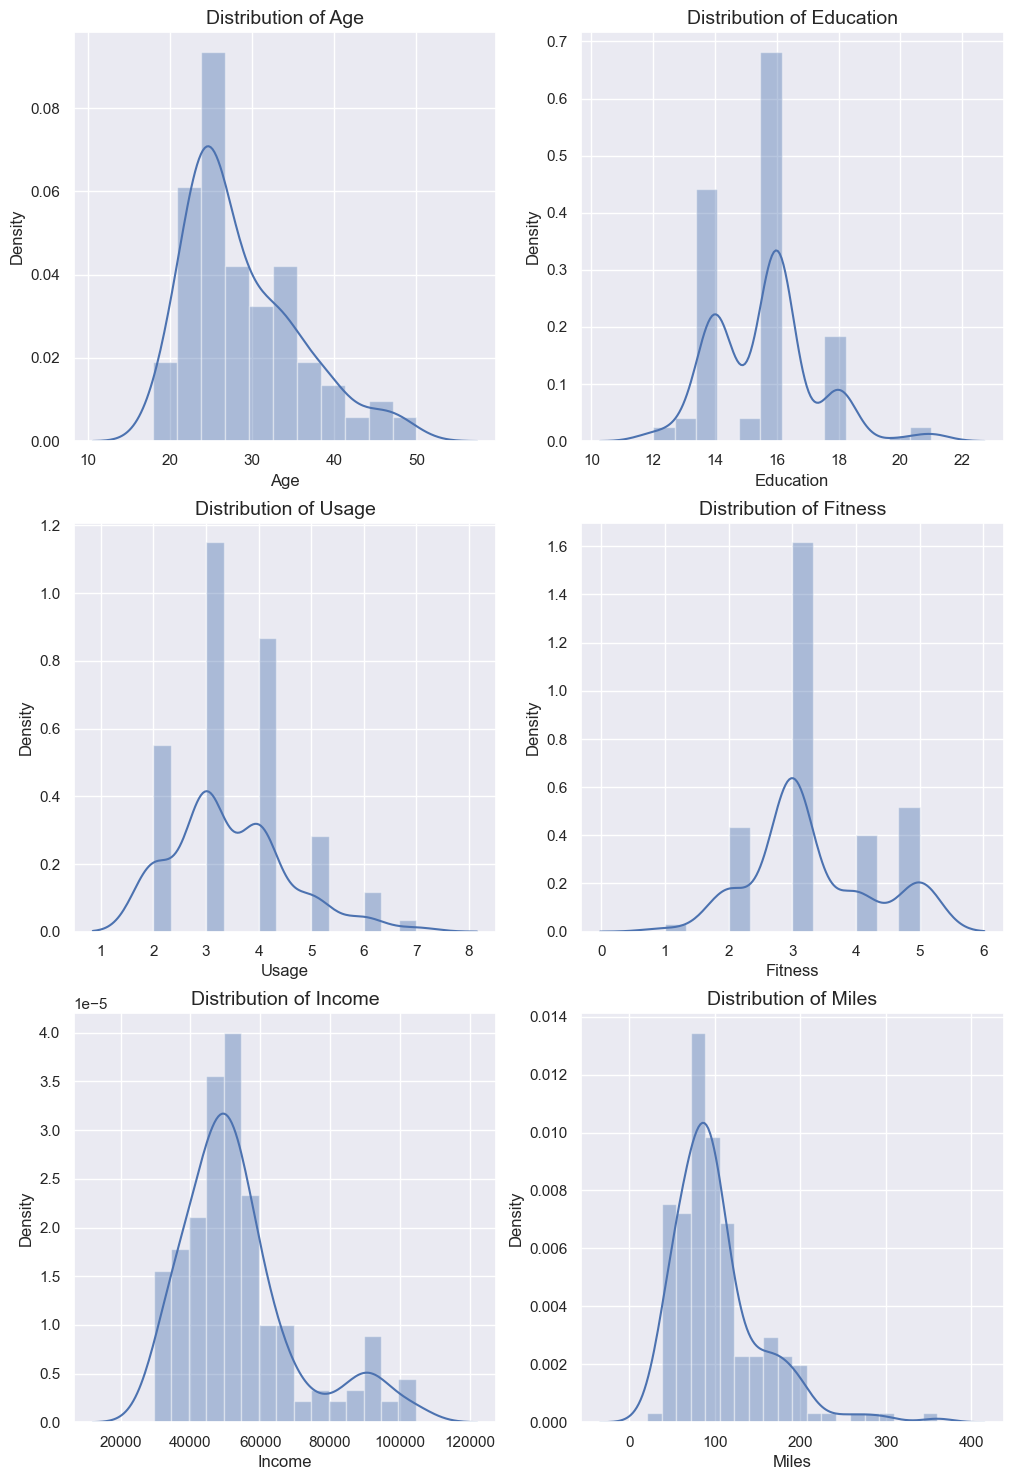

In [107]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
fig.subplots_adjust(top = 1.5)

sns.distplot(df['Age'], ax = axis[0,0])
sns.distplot(df['Education'], ax = axis[0,1])
sns.distplot(df['Usage'], ax = axis[1,0])
sns.distplot(df['Fitness'], ax = axis[1,1])
sns.distplot(df['Income'], ax = axis[2,0])
sns.distplot(df['Miles'], ax = axis[2,1])

axis[0,0].set_title("Distribution of Age", fontsize = 14)
axis[0,1].set_title("Distribution of Education", fontsize = 14)
axis[1,0].set_title("Distribution of Usage", fontsize = 14)
axis[1,1].set_title("Distribution of Fitness", fontsize = 14)
axis[2,0].set_title("Distribution of Income", fontsize = 14)
axis[2,1].set_title("Distribution of Miles", fontsize = 14)
plt.show()

#### Takeaways:
* `Income` and `Miles` have outliers based upon the above distributions, which leads them to have right-skew distribution.
* `Fitness` level 3 customers buy the majority of all treadmills.
* Majority of all customers fall within `$30,000 to $60,000 income` range.

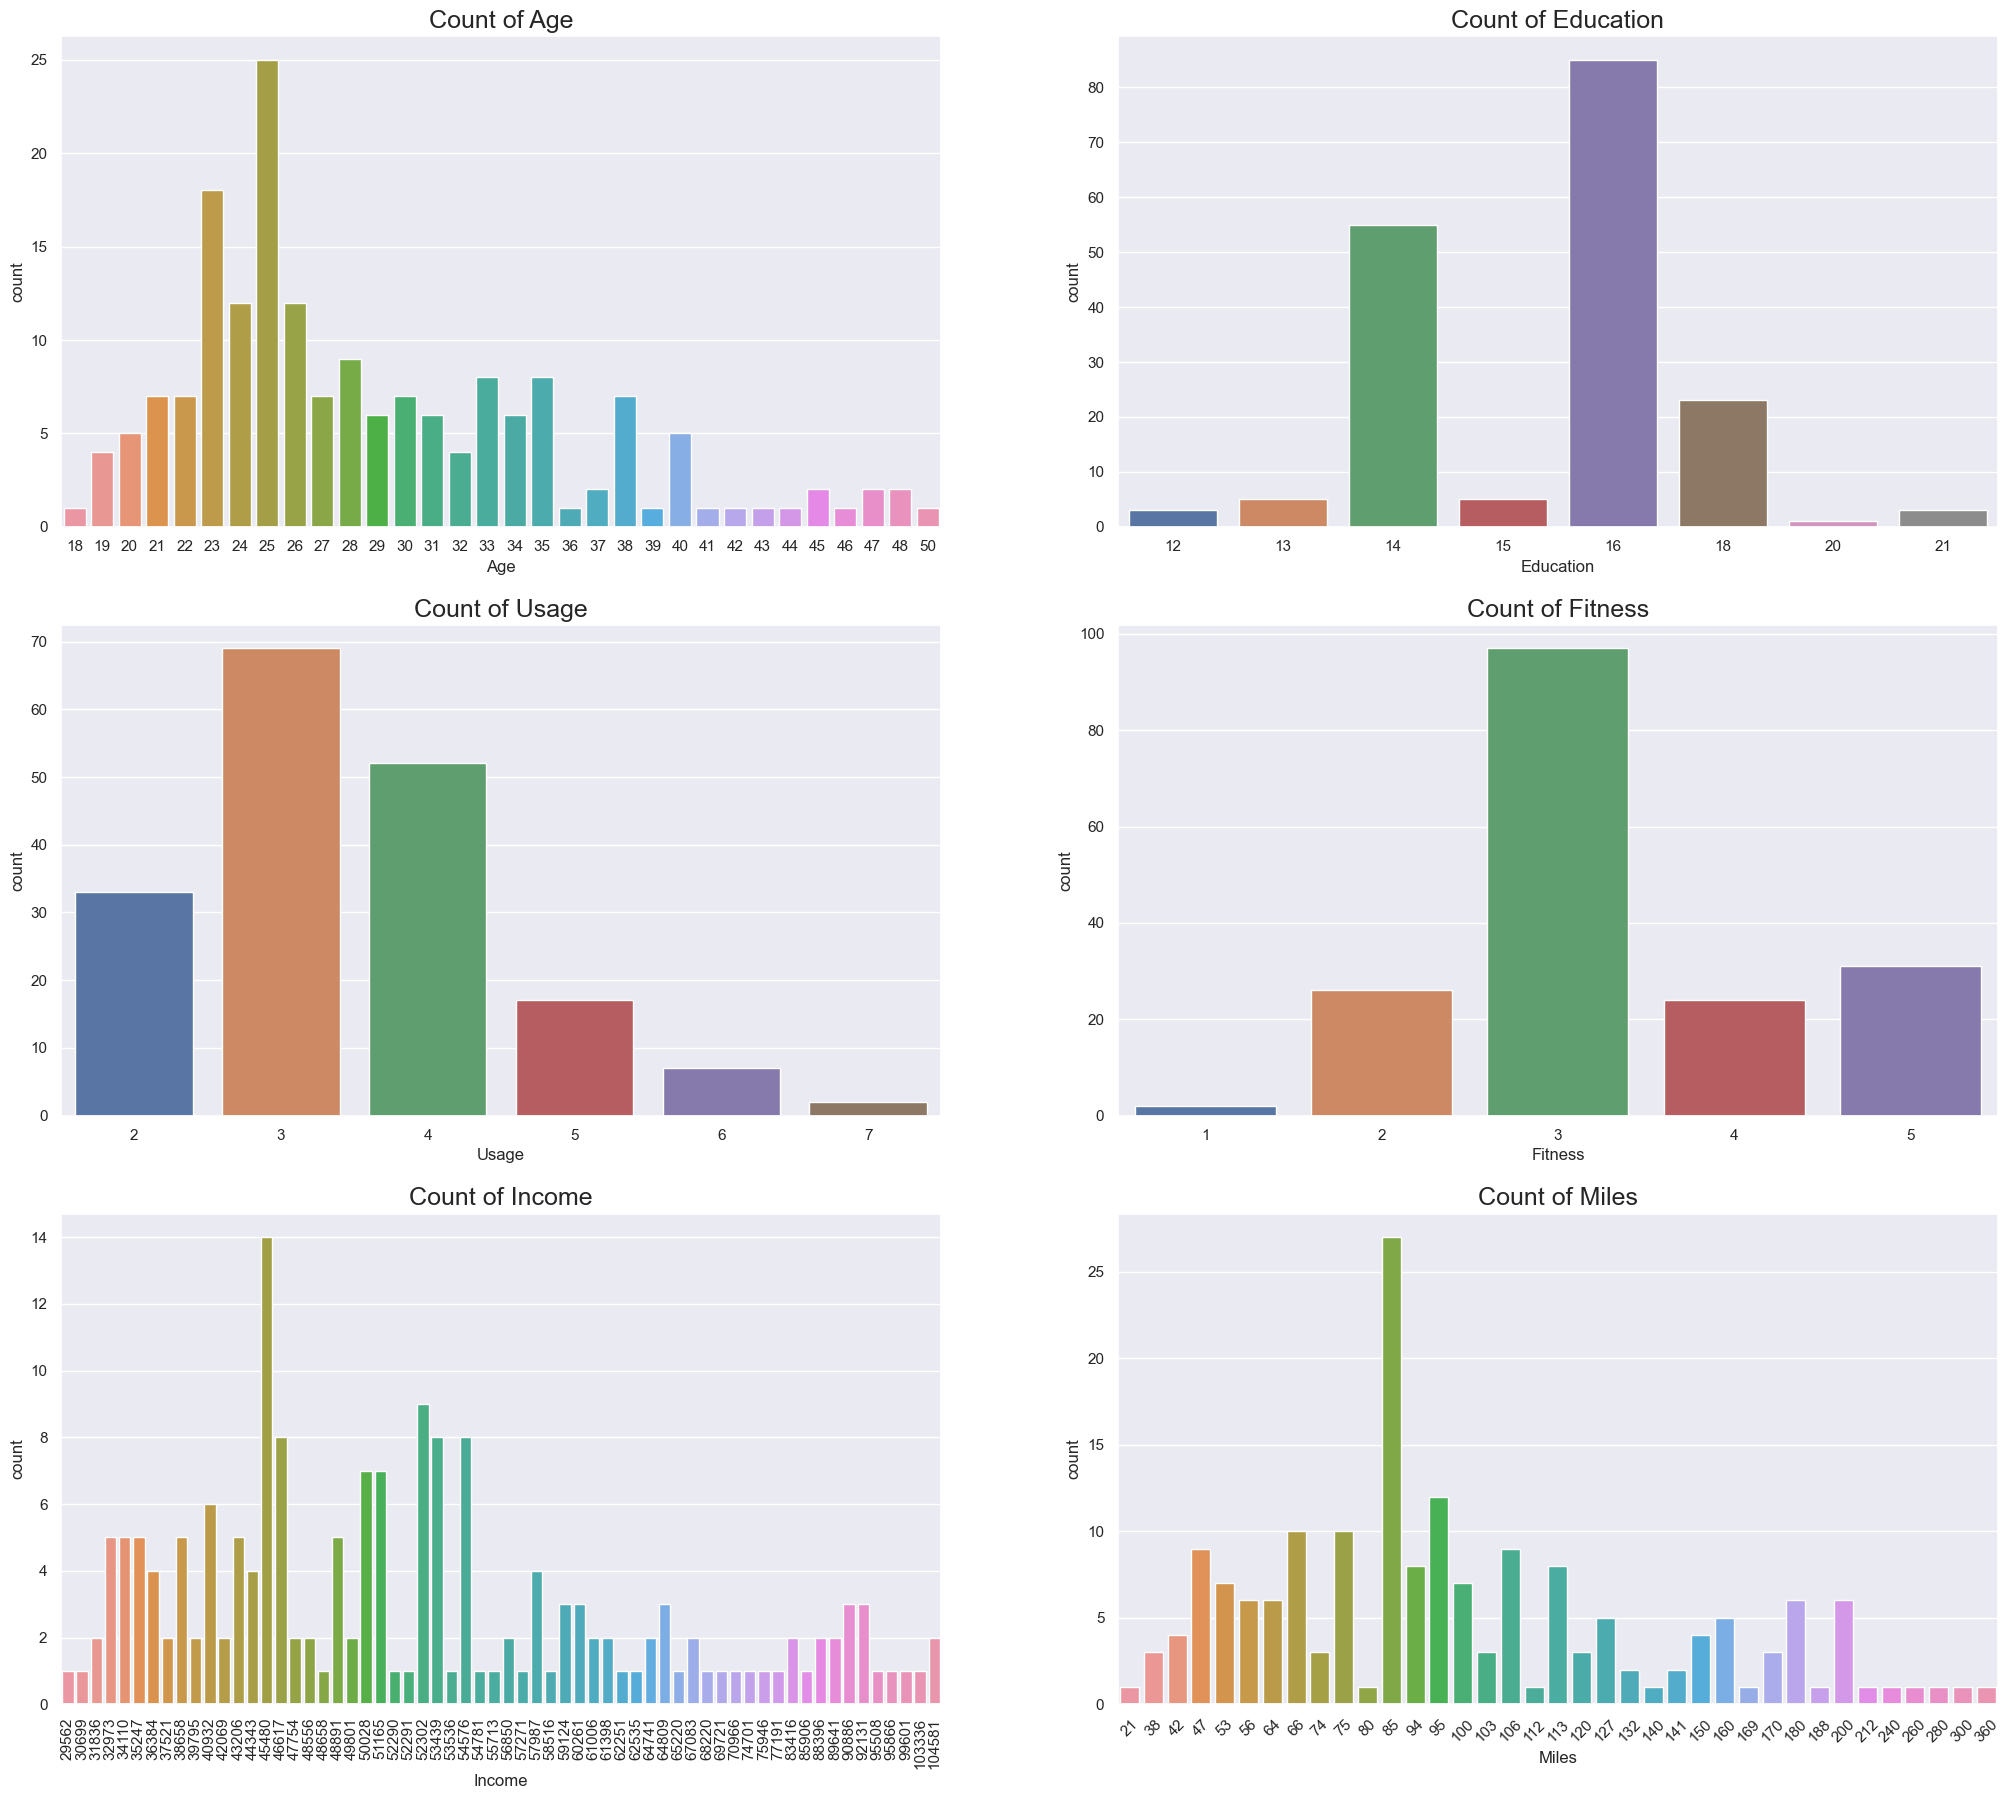

In [109]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (25, 12))
fig.subplots_adjust(top = 1.5)

sns.countplot(data = df, x = 'Age', ax = axis[0,0])
sns.countplot(data = df, x = 'Education', ax = axis[0,1])
sns.countplot(data = df, x = 'Usage', ax = axis[1,0])
sns.countplot(data = df, x = 'Fitness', ax = axis[1,1])
sns.countplot(data = df, x = 'Income', ax = axis[2,0])
axis[2,0].set_xticklabels(axis[2,0].get_xticklabels(),rotation = 90)
sns.countplot(data = df, x = 'Miles', ax = axis[2,1])
axis[2,1].set_xticklabels(axis[2,1].get_xticklabels(),rotation = 45)

axis[0,0].set_title("Count of Age", fontsize = 18)
axis[0,1].set_title("Count of Education", fontsize = 18)
axis[1,0].set_title("Count of Usage", fontsize = 18)
axis[1,1].set_title("Count of Fitness", fontsize = 18)
axis[2,0].set_title("Count of Income", fontsize = 18)
axis[2,1].set_title("Count of Miles", fontsize = 18)

plt.show()

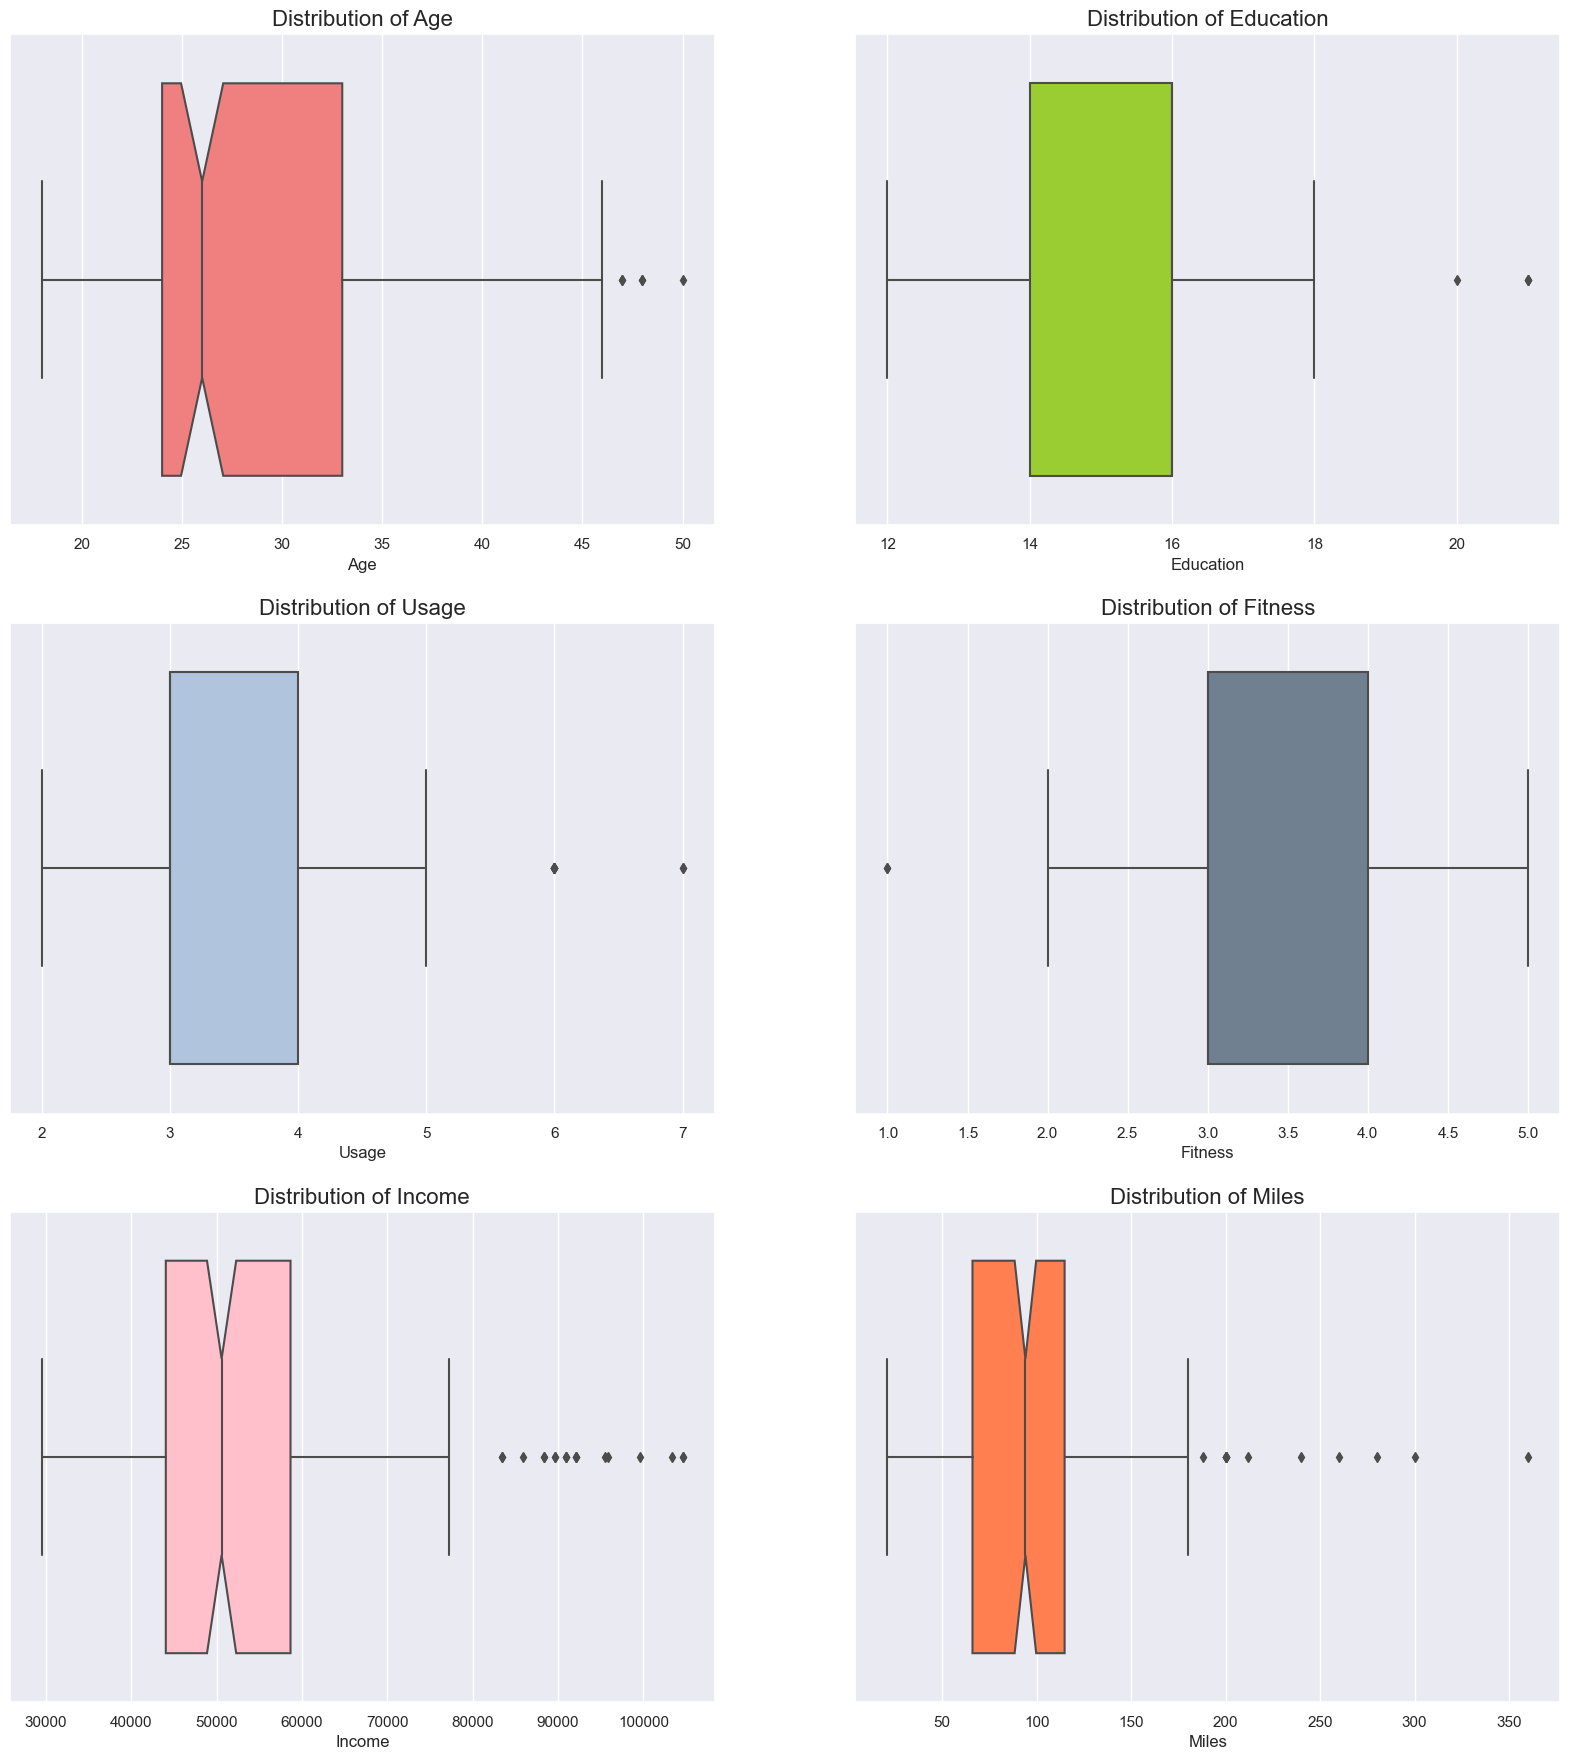

In [111]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 12))
fig.subplots_adjust(top = 1.5)

sns.boxplot(data = df, x = 'Age', notch = True, boxprops = {"facecolor": "lightcoral"}, ax = axis[0,0])
sns.boxplot(data = df, x = 'Education', boxprops = {"facecolor": "yellowgreen"}, ax = axis[0,1])
sns.boxplot(data = df, x = 'Usage', boxprops = {"facecolor": "lightsteelblue"}, ax = axis[1,0])
sns.boxplot(data = df, x = 'Fitness', boxprops = {"facecolor": "slategray"}, ax = axis[1,1])
sns.boxplot(data = df, x = 'Income', notch = True, boxprops = {"facecolor": "pink"}, ax = axis[2,0])
sns.boxplot(data = df, x = 'Miles', notch = True, boxprops = {"facecolor": "coral"}, ax = axis[2,1])

axis[0,0].set_title("Distribution of Age", fontsize = 16)
axis[0,1].set_title("Distribution of Education", fontsize = 16)
axis[1,0].set_title("Distribution of Usage", fontsize = 16)
axis[1,1].set_title("Distribution of Fitness", fontsize = 16)
axis[2,0].set_title("Distribution of Income", fontsize = 16)
axis[2,1].set_title("Distribution of Miles", fontsize = 16)
plt.show()

#### Takeaways:
* `Income` and `Miles` have several outliers.

## Univariate Analysis of Categorical Variables

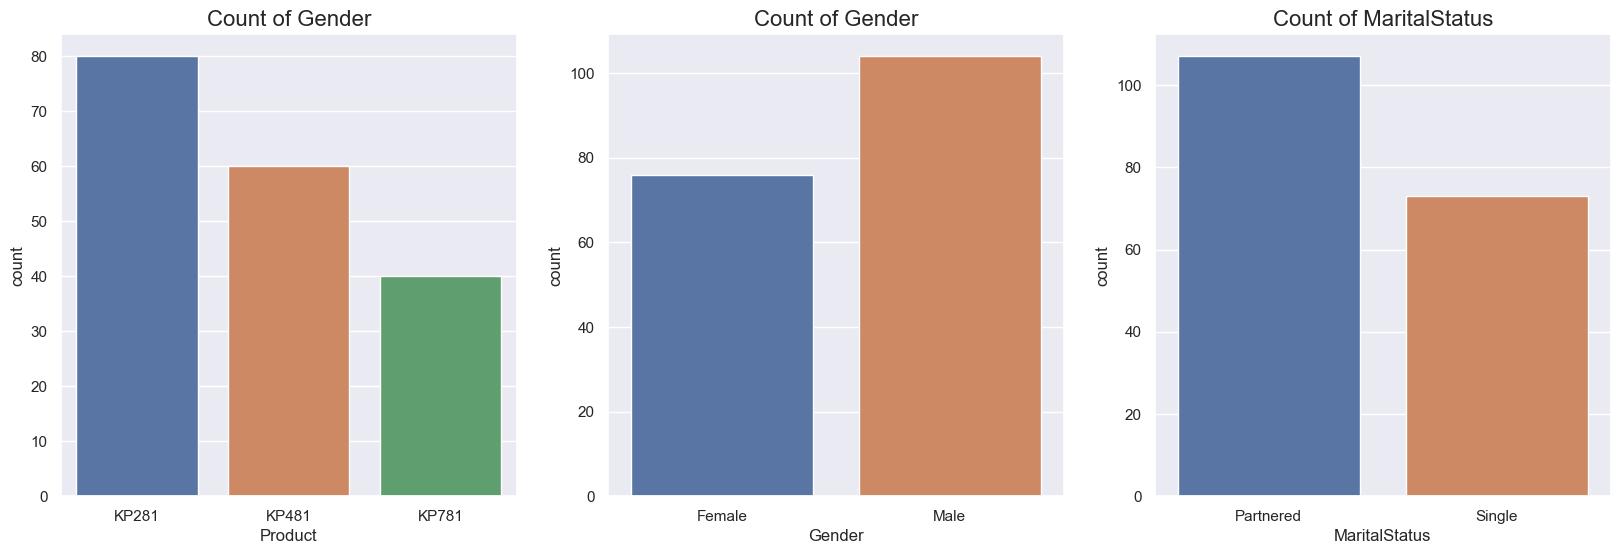

In [128]:
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

sns.countplot(data = df, x = 'Product', ax = axis[0])
sns.countplot(data = df, x = 'Gender', ax = axis[1])
sns.countplot(data = df, x = 'MaritalStatus', ax = axis[2])

axis[0].set_title("Count of Gender", fontsize = 16)
axis[1].set_title("Count of Gender", fontsize = 16)
axis[2].set_title("Count of MaritalStatus", fontsize = 16)
plt.show()

#### Takeaways:
* `KP281` is best selling model.
* `Males` purchase more treadmills than `Females`.
* `Partnered` couples are more likely to purchase a treadmill than `Single` people.

## Bivariate Analysis of Variables

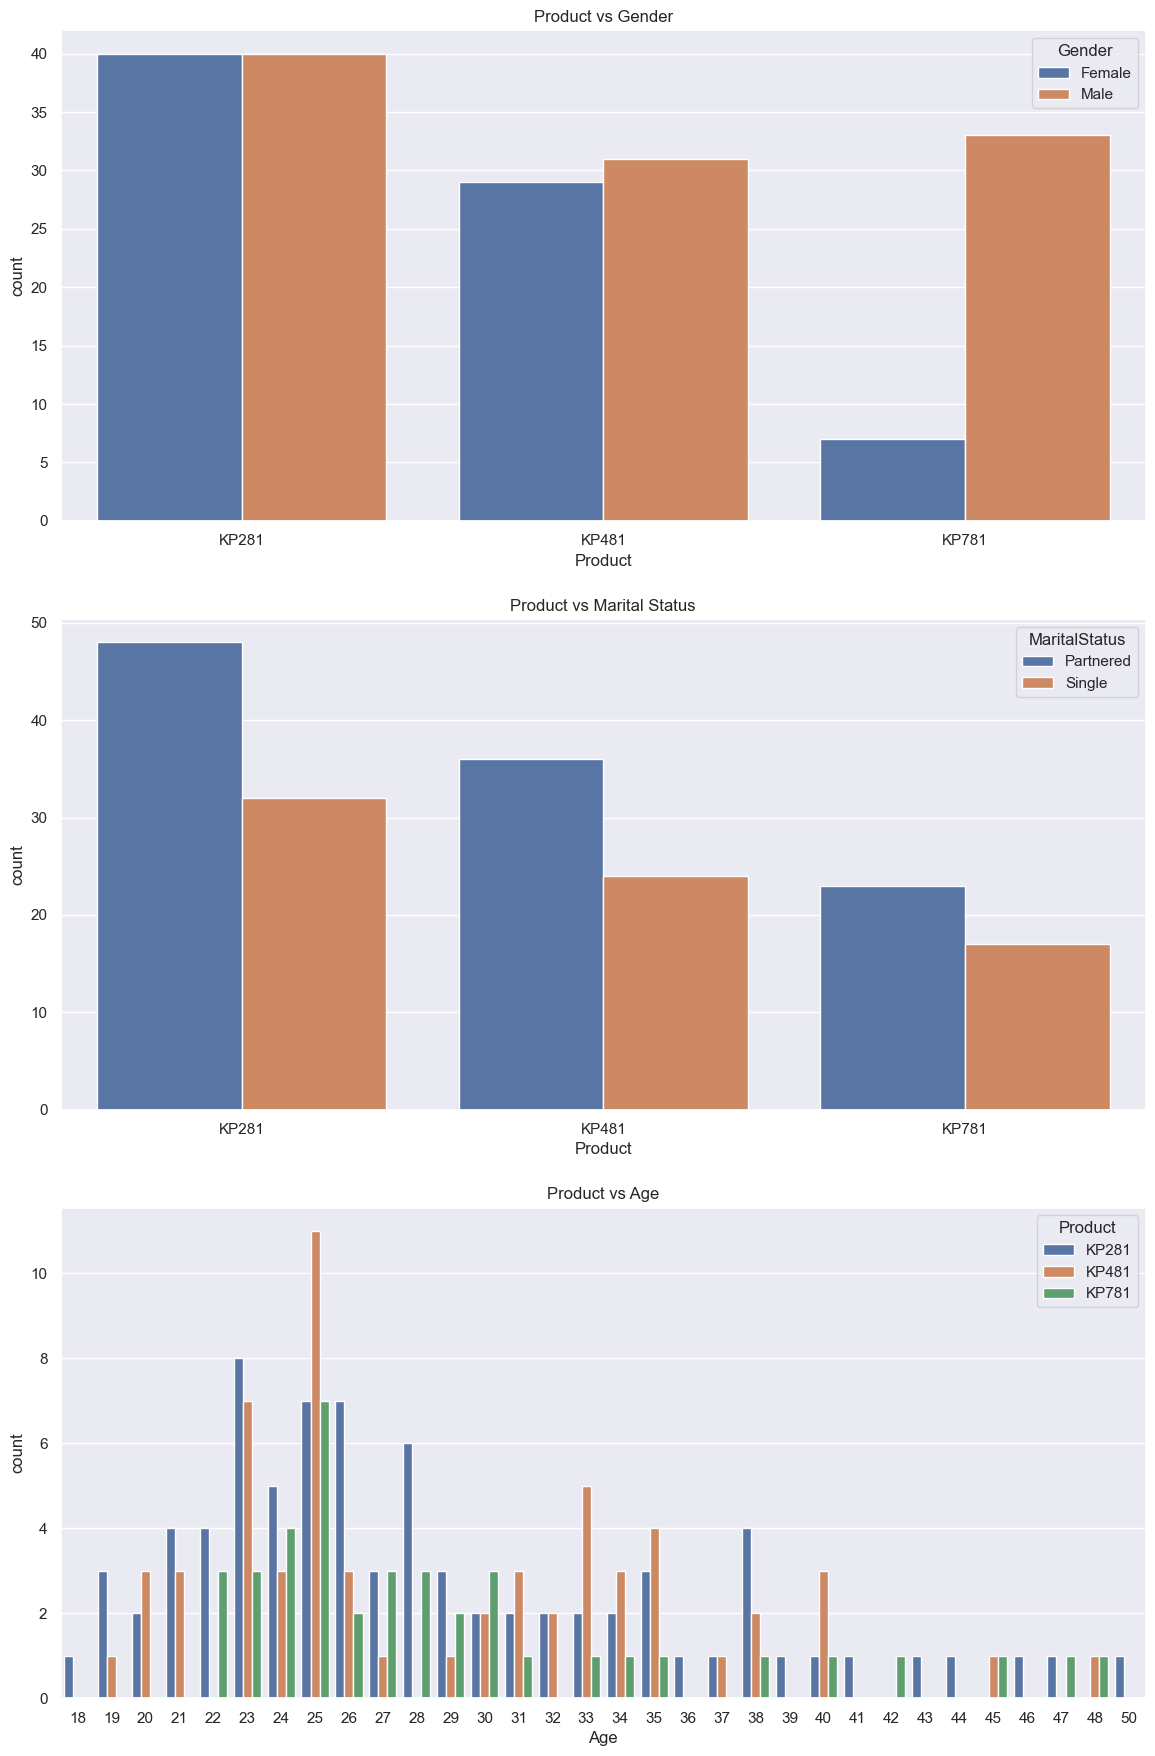

In [234]:
fig, axis = plt.subplots(nrows = 3, ncols = 1, figsize = (14, 12))
fig.subplots_adjust(top = 1.5)

sns.countplot(data = df, x = 'Product', hue = 'Gender', ax = axis[0])
sns.countplot(data = df, x = 'Product', hue = 'MaritalStatus', ax = axis[1])
sns.countplot(data = df, x = 'Age', hue = 'Product', ax = axis[2])

axis[0].set_title("Product vs Gender")
axis[1].set_title("Product vs Marital Status")
axis[2].set_title("Product vs Age")
plt.show()

#### Takeaways:
* Product vs Gender:
    * `Males` and `Females` purchase `KP281` and `KP481` models almost equally.
    * `KP781` model purchased predominantly by `Males`.
* Product vs Marital Status:
    * `Partnered` couples more likely to purchase any treadmill over their `Single` counterparts.

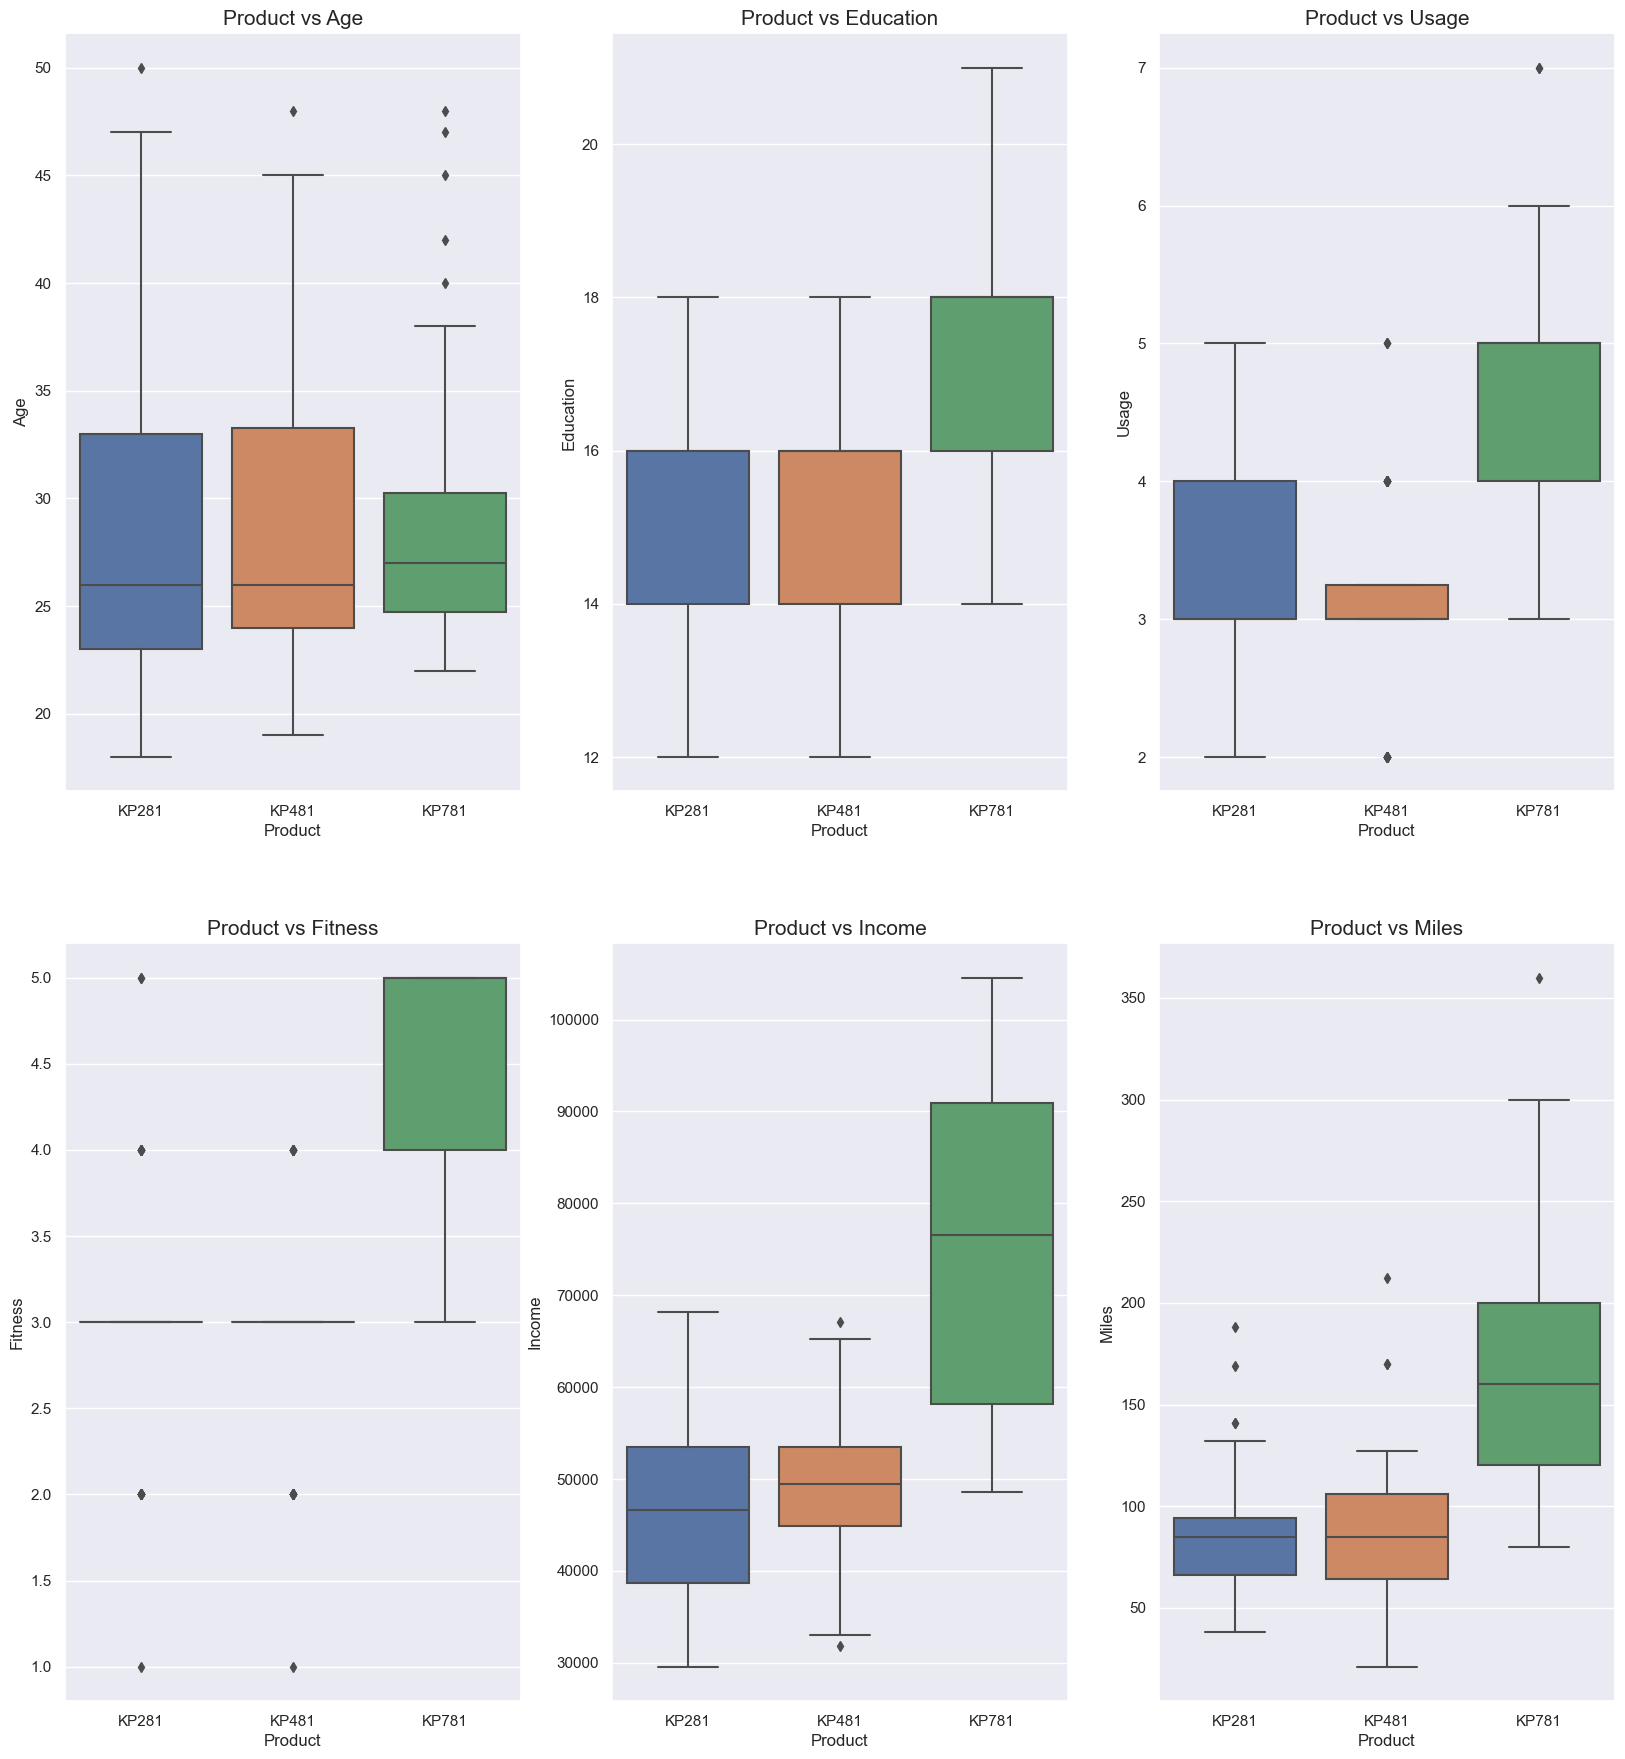

In [133]:
att = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

sns.set(color_codes = True)
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 12))
fig.subplots_adjust(top = 1.5)

count = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(data = df, x ="Product", y = att[count],  ax = axis[row, col])
        axis[row, col].set_title(f"Product vs {att[count]}", fontsize = 15)
        count += 1

## Multivariate Analysis

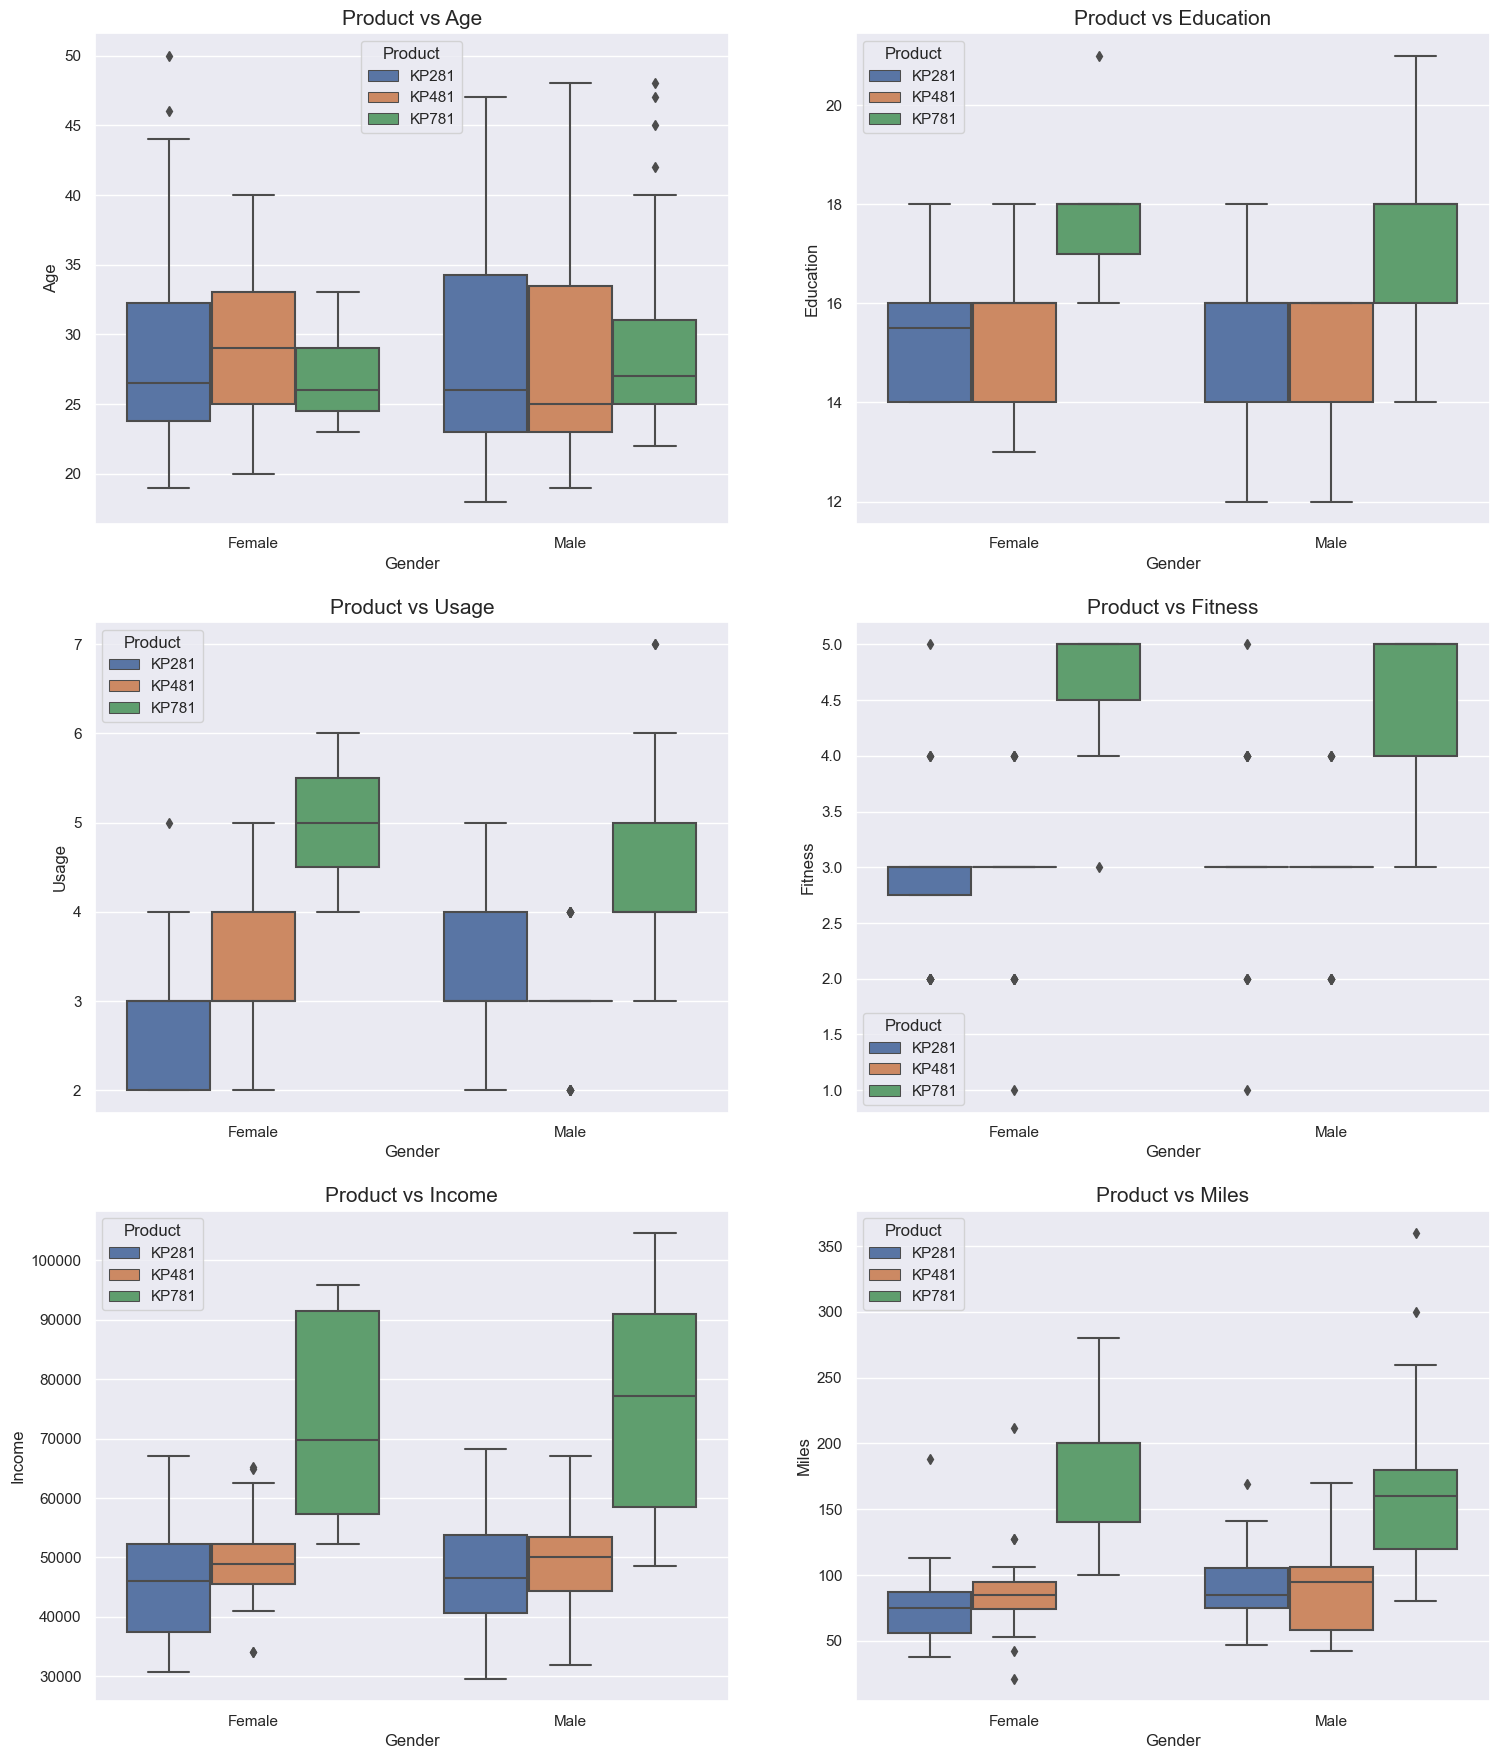

In [134]:
sns.set(color_codes = True)
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 12))
fig.subplots_adjust(top = 1.5)

count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data = df, x = 'Gender', y = att[count], hue = "Product", ax = axis[row, col])
        axis[row, col].set_title(f"Product vs {att[count]}", fontsize = 15)
        count += 1

# Correlation

In [135]:
df.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [136]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


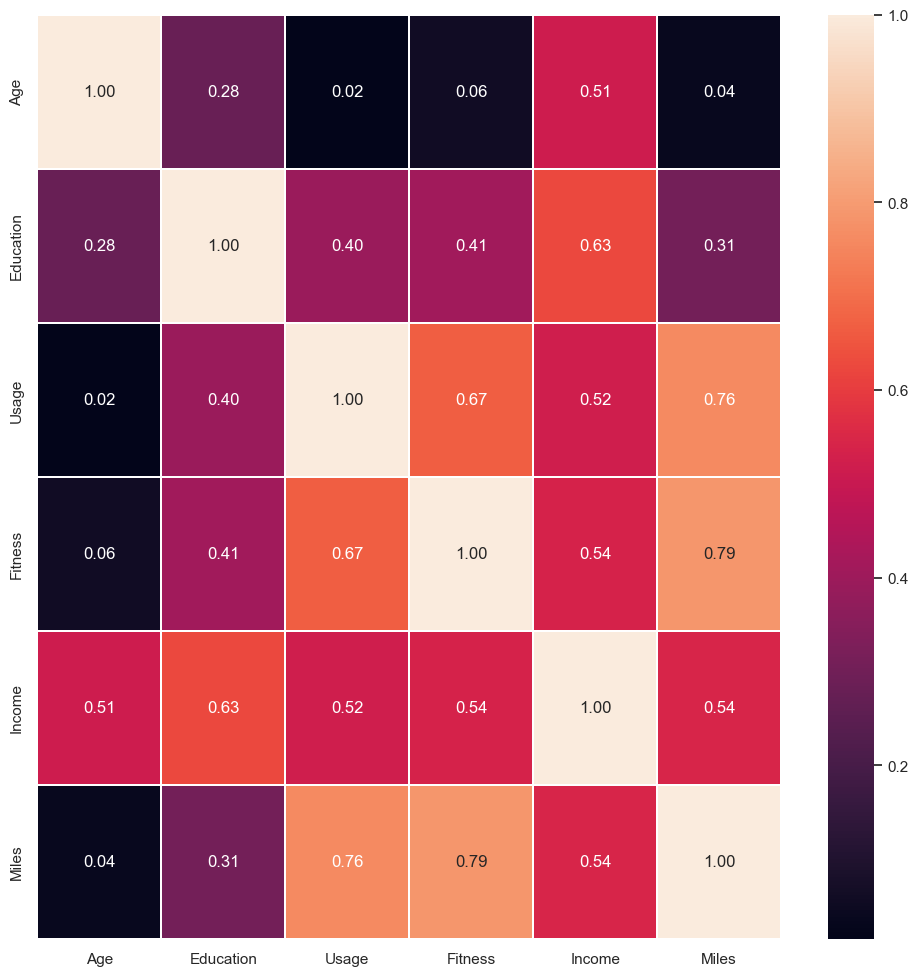

In [140]:
fig, axis = plt.subplots(figsize = (12, 12))
sns.set(color_codes = True)
sns.heatmap(df.corr(), ax = axis, annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

# Pair Plots

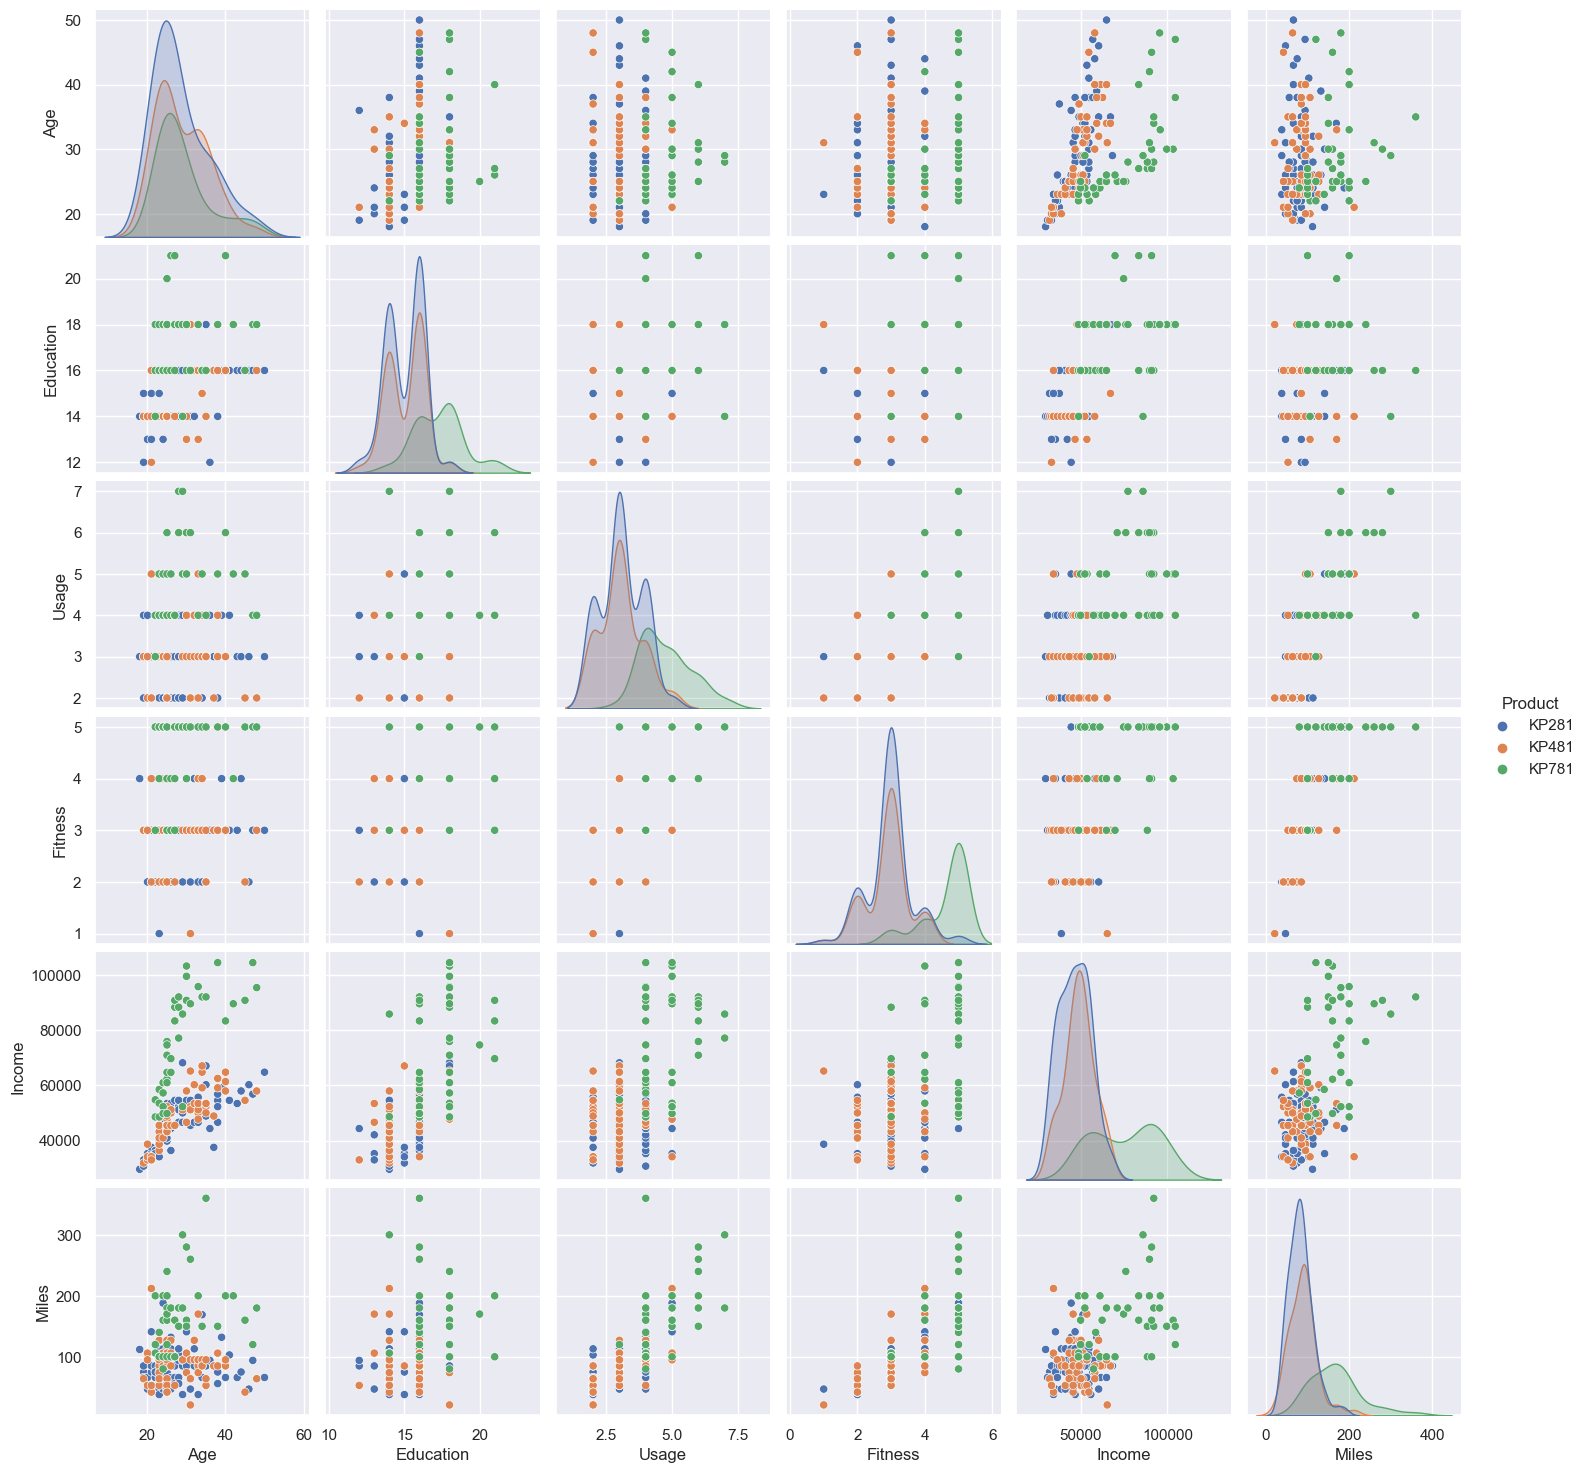

In [235]:
sns.pairplot(df, hue = "Product")
plt.show()

# Marginal and Conditional Probabilities

In [152]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
(df1.groupby(['variable', 'value'])[['value']].count() /  len(df)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

#### Takeaways:
* Gender:
    * 57.78% of all customers are `Male`.
* Marital Status:
    * 59.44% of all customers are `Partnered`.
* Product:
    * 44.44% of all treadmill purchases are of the `KP281` model.

### Probability of treadmill purchases by `Gender` and `Product`:

In [179]:
def prob_of_prod_gender(gender, print_marginal = False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid Value."
    
    df1 = pd.crosstab(index = df['Gender'], columns = [df['Product']])
    p281 = df1['KP281'][gender] / df1.loc[gender].sum()
    p481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p781 = df1['KP781'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"Total Male Percentage: {df1.loc['Male'].sum() / len(df):.2f}")
        print(f"Total Female Percentage: {df1.loc['Female'].sum() / len(df):.2f}\n")
    
    print(f"{gender} Percentage by Product")
    print(f"KP281: {p281:.2f}")
    print(f"KP481: {p481:.2f}")
    print(f"KP781: {p781:.2f}\n")
    
prob_of_prod_gender('Male', True)
prob_of_prod_gender('Female')

Total Male Percentage: 0.58
Total Female Percentage: 0.42

Male Percentage by Product
KP281: 0.38
KP481: 0.30
KP781: 0.32

Female Percentage by Product
KP281: 0.53
KP481: 0.38
KP781: 0.09



### Probability of treadmill purchases by `MaritalStatus` and `Product`:

In [180]:
def prob_of_prod_maritalstatus(status, print_marginal = False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid Value."
    
    df1 = pd.crosstab(index = df['MaritalStatus'], columns = [df['Product']])
    p281 = df1['KP281'][status] / df1.loc[status].sum()
    p481 = df1['KP481'][status] / df1.loc[status].sum()
    p781 = df1['KP781'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"Total Single Percentage: {df1.loc['Single'].sum() / len(df):.2f}")
        print(f"Total Partnered Percentage: {df1.loc['Partnered'].sum() / len(df):.2f}\n")
    
    print(f"{status} Percentage by Product")
    print(f"KP281: {p281:.2f}")
    print(f"KP481: {p481:.2f}")
    print(f"KP781: {p781:.2f}\n")
    
prob_of_prod_maritalstatus('Single', True)
prob_of_prod_maritalstatus('Partnered')

Total Single Percentage: 0.41
Total Partnered Percentage: 0.59

Single Percentage by Product
KP281: 0.44
KP481: 0.33
KP781: 0.23

Partnered Percentage by Product
KP281: 0.45
KP481: 0.34
KP781: 0.21



### `Products` by `Gender`:

In [163]:
prod_gender = pd.crosstab(index = df['Product'], columns = [df['Gender']], margins = True)
prod_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [173]:
mprob = round((prod_gender['Male']['All'] / prod_gender['All']['All']), 2)
mpct = round(mprob * 100, 2)
print("Percentage of Males purchasing any treadmill:",mpct)

Percentage of Males purchasing any treadmill: 58.0


In [174]:
fprob = round((prod_gender['Female']['All'] / prod_gender['All']['All']), 2)
fpct = round(fprob * 100, 2)
print("Percentage of Females purchasing any treadmill:",fpct)

Percentage of Females purchasing any treadmill: 42.0


In [183]:
f781prob = round((prod_gender['Female']['KP781'] / prod_gender['Female']['All']), 2)
f781pct = round(f781prob * 100, 2)
print("Probability of a Female purchasing the KP781 treadmill:",f781pct)

Probability of a Female purchasing the KP781 treadmill: 9.0


In [184]:
f781prob = round((prod_gender['Female']['KP781'] / prod_gender['All']['All']), 2)
f781pct = round(f781prob * 100, 2)
print("Probability of a Female purchasing the KP781 treadmill against all customers:",f781pct)

Probability of a Female purchasing the KP781 treadmill against all customers: 4.0


### `Product` by `Age`:

In [202]:
df2 = df.copy()

In [236]:
age_bins = [13, 20, 30, 40, 60]
age_labels = ["Teens", "20s", "30s", "40+"]
df2['Age_group'] = pd.cut(df2['Age'], age_bins)
df2['Age_categories'] = pd.cut(df2['Age'], age_bins, labels = age_labels)

In [237]:
df2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Age_categories
0,KP281,18,Male,14,Single,3,4,29562,112,"(13, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(13, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(13, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(13, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(13, 20]",Teens


In [238]:
df2.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Age_categories
175,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]",30s
176,KP781,42,Male,18,Single,5,4,89641,200,"(40, 60]",40+
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",40+
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",40+
179,KP781,48,Male,18,Partnered,4,5,95508,180,"(40, 60]",40+


In [239]:
prod_age_cat = pd.crosstab(index = df2['Product'], columns = [df2['Age_categories']], margins = True)
prod_age_cat

Age_categories,Teens,20s,30s,40+,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [240]:
prob_age = round((prod_age_cat['20s']['All'] / prod_age_cat['All']['All']), 2)
pct_prob_age = round(prob_age * 100, 2)
pct_prob_age

61.0

#### Takeaways:
* `Teens` don't purchase many treadmills, with the `KP781` model likely being too expensive for them.
* 61% of all customers are between 20 and 30 in `Age`.
* Majority of all `Product` purchases are for customers between `Ages` 20 and 40.

### `Product` by `Income`:

In [210]:
df3 = df.copy()

In [218]:
income_bins = [10000, 35000, 60000, 85000, 110000]
income_labels = ['Low Income', 'Lower-middle Income', 'Upper-middle Income', 'High Income']
df3['Income_category'] = pd.cut(df3['Income'], income_bins, labels = income_labels)

In [219]:
df3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_category
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower-middle Income


In [220]:
df3.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_category
175,KP781,40,Male,21,Single,6,5,83416,200,Upper-middle Income
176,KP781,42,Male,18,Single,5,4,89641,200,High Income
177,KP781,45,Male,16,Single,5,5,90886,160,High Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,High Income
179,KP781,48,Male,18,Partnered,4,5,95508,180,High Income


In [221]:
prod_income_cat = pd.crosstab(index = df3['Product'], columns = [df3['Income_category']], margins = True)
prod_income_cat

Income_category,Low Income,Lower-middle Income,Upper-middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [222]:
lowprob = round(prod_income_cat['Low Income']['All'] / prod_income_cat['All']['All'], 2)
lowpct = round(lowprob * 100, 2)
lowpct

8.0

In [223]:
highprob = round(prod_income_cat['High Income']['All'] / prod_income_cat['All']['All'], 2)
highpct = round(highprob * 100, 2)
highpct

9.0

In [224]:
high781prob = round(prod_income_cat['High Income']['KP781'] / prod_income_cat['All']['KP781'], 2)
high781pct = round(high781prob * 100, 2)
high781pct

42.0

### `Product` by `Fitness`:

In [225]:
prod_fitness = pd.crosstab(index = df['Product'], columns = [df3['Fitness']], margins = True)
prod_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


### `Product` by `MaritalStatus`:

In [226]:
prod_mstatus = pd.crosstab(index = df['Product'], columns = [df3['MaritalStatus']], margins = True)
prod_mstatus

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


# Outliers
## Adjusting for `Income`:

In [227]:
df1 = df.copy()

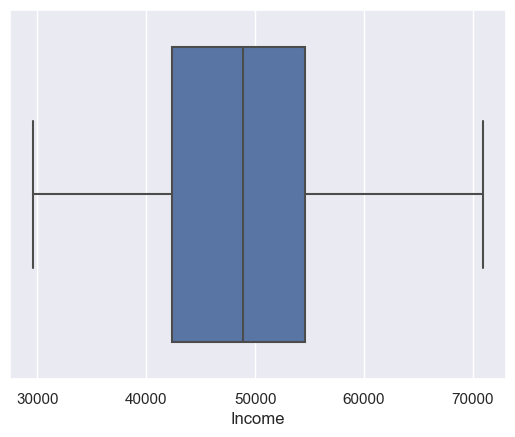

In [229]:
Q3 = df1['Income'].quantile(0.75)
Q1 = df1['Income'].quantile(0.25)
IQR = Q3 - Q1
df1 = df1[(df1['Income'] > Q1 - 1.5 * IQR) & (df1['Income'] < Q3 + 1.5 * IQR)]

sns.boxplot(data = df1, x = 'Income')
plt.show()

## Adjusting for `Miles`:

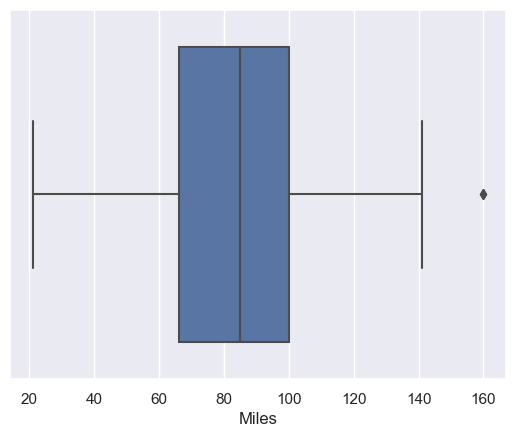

In [231]:
Q3 = df1['Miles'].quantile(0.75)
Q1 = df1['Miles'].quantile(0.25)
IQR = Q3 - Q1
df1 = df1[(df1['Miles'] > Q1 - 1.5 * IQR) & (df1['Miles'] < Q3 + 1.5 * IQR)]

sns.boxplot(data = df1, x = 'Miles')
plt.show()

In [232]:
# With outliers
df.shape

(180, 9)

In [233]:
# Without outliers
df1.shape

(147, 9)